# Project Name: Iris Dataset Visualization using Principal Component Analysis (PCA)

**Overview:**
This project introduces students to dimensionality reduction through Principal Component Analysis (PCA), utilizing the well-known Iris dataset. Students will learn how PCA simplifies data visualization by transforming high-dimensional data into 2D or 3D representations, making it easier to analyze and interpret.

**You have:**
* The Iris dataset, containing features like sepal length, sepal width, petal length, petal width, and species labels.
* Basic proficiency in Python, scikit-learn, NumPy, pandas, and visualization tools such as matplotlib.

**We will:**
1. Preprocess the Iris dataset by normalizing and standardizing the features.
2. Apply PCA to reduce the dimensionality of the dataset to two or three principal components.
3. Visualize the PCA-transformed data using scatter plots, highlighting species differentiation and interpreting principal components.

**Goal:**
Students will acquire practical skills in PCA, learning how to visualize and interpret data effectively, and gaining insights into how dimensionality reduction can clarify patterns in complex datasets.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import base64
from IPython.display import display, HTML
import os

## Notebook utility

In [8]:
image_paths = ["img/PCA_gif.gif", "img/PCA1.png", "img/PCA2.png", "img/PCA3.png", "img/PCA4.webp", "img/PCA5.webp"]
image_size = [1000, 700, 700, 400, 600, 500]
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open("../"+path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)

## Theoretical Background


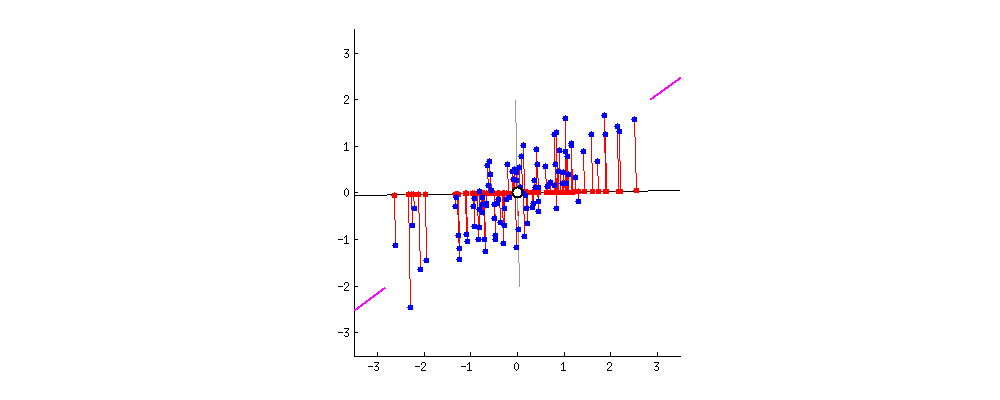

In [9]:
display(HTML(images_html[0]))


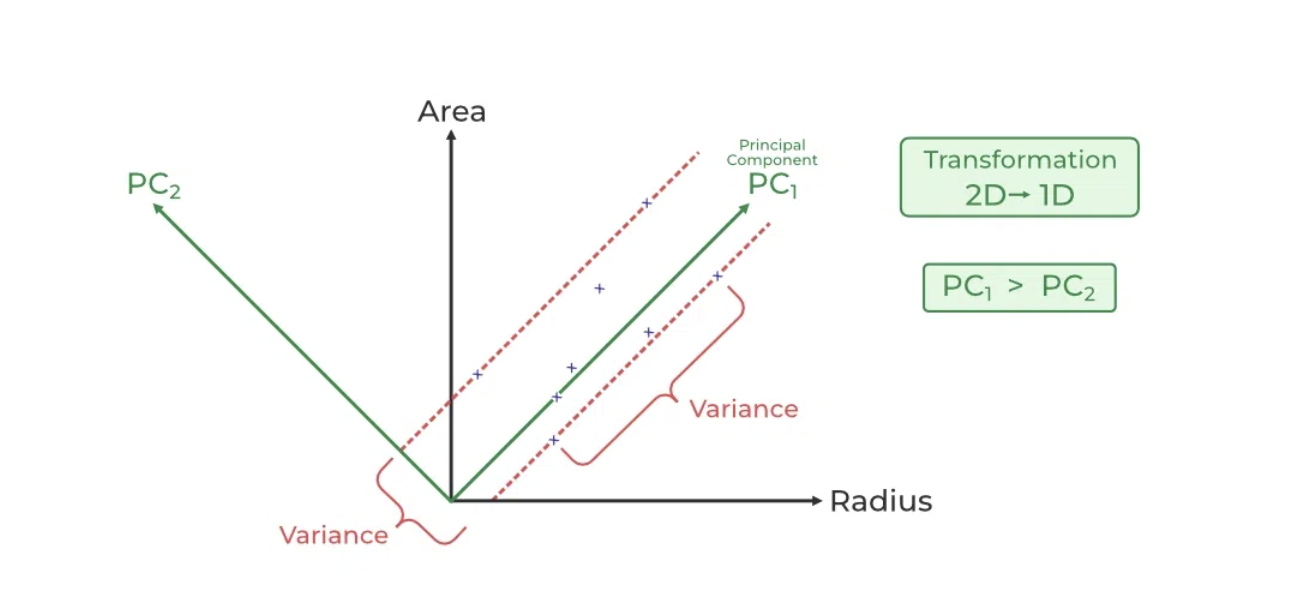

In [10]:
display(HTML(images_html[1]))


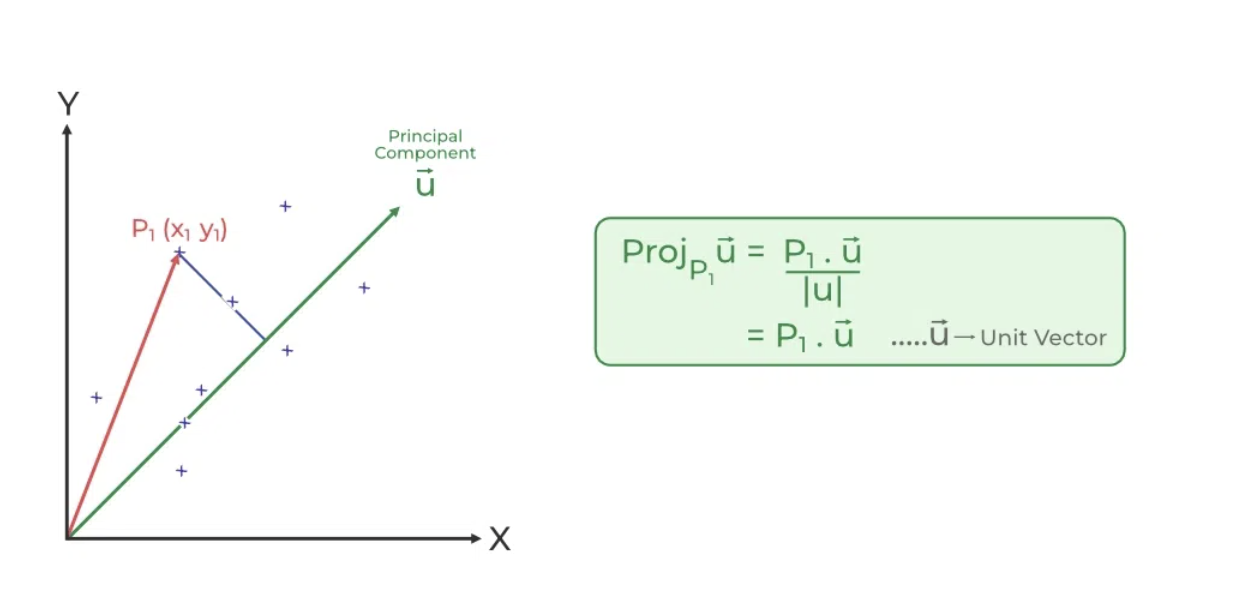

In [11]:
display(HTML(images_html[2]))

#### SVD Decomposition


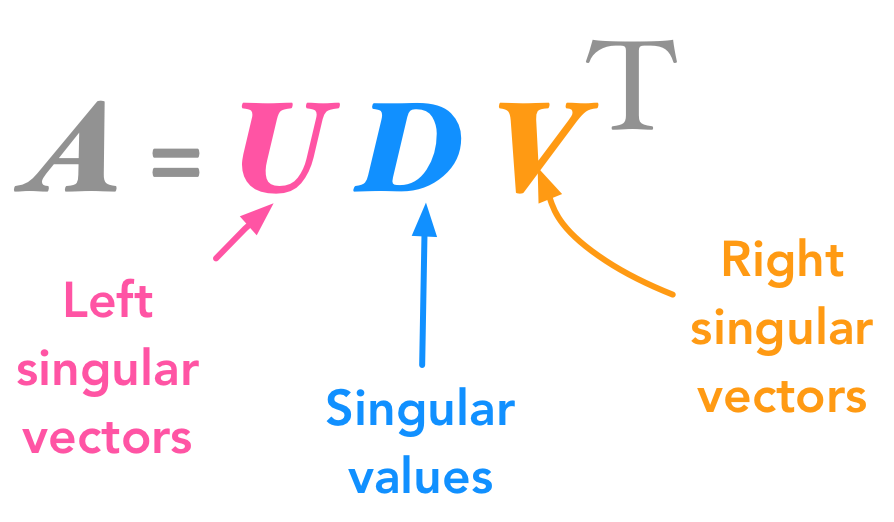

In [13]:
display(HTML(images_html[3]))


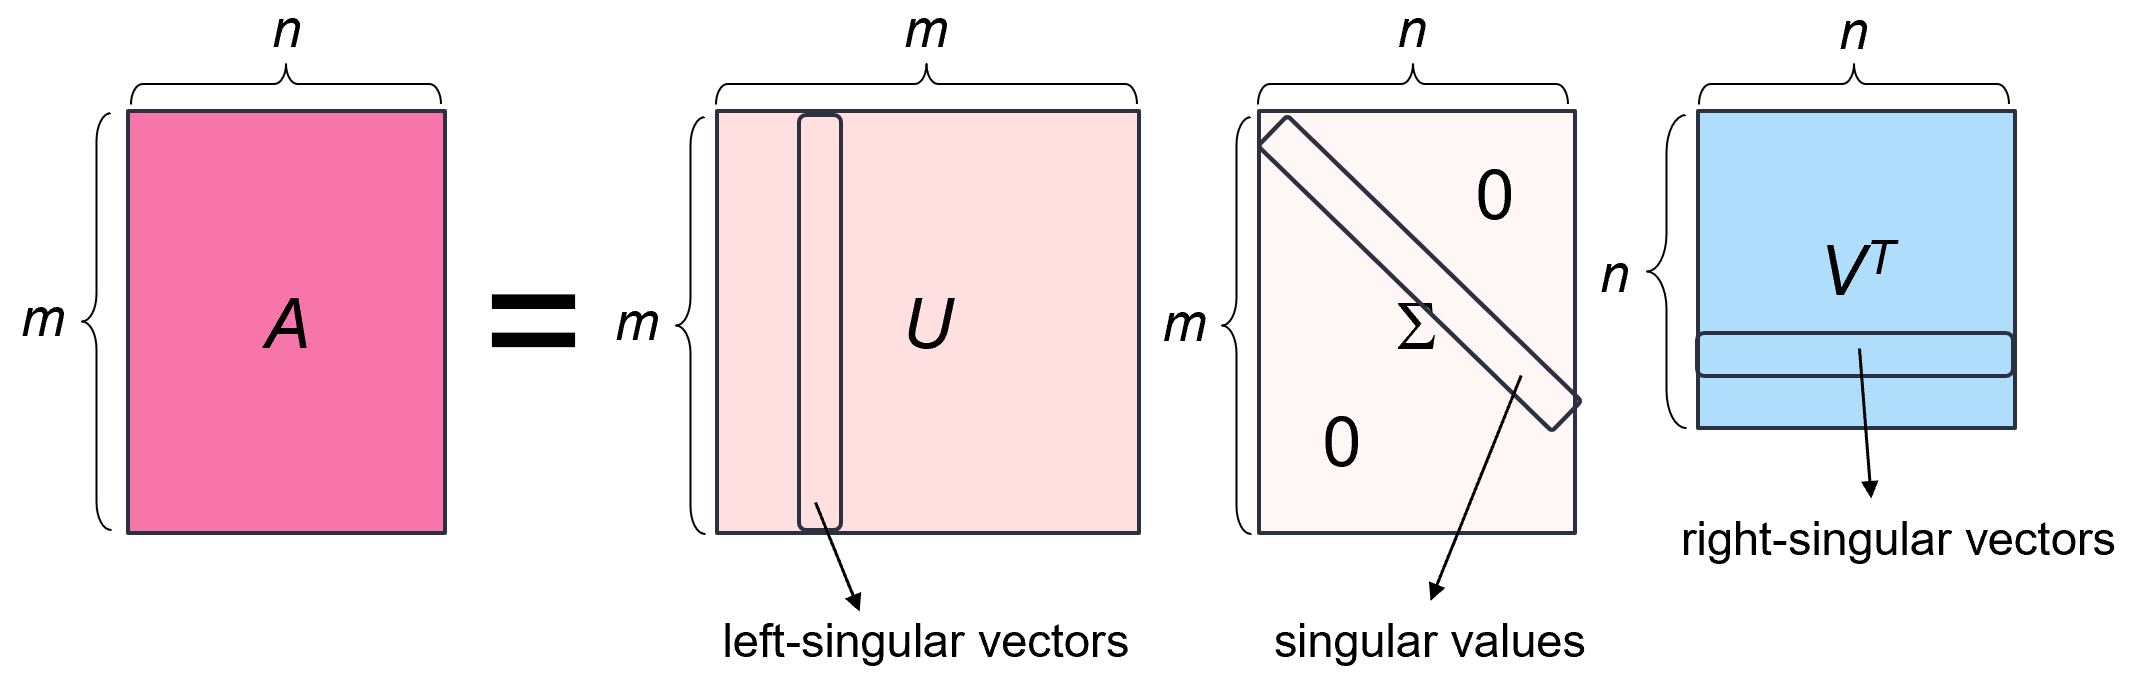

In [14]:
display(HTML(images_html[4]))

In [15]:
X = np.random.rand(100, 3)

In [16]:
X_centered = 0.01 * (X - X.mean(axis=0))

In [17]:
U, s, Vt = np.linalg.svd(X_centered)

In [18]:
c1 = Vt[0]
c2 = Vt[1]

In [19]:
W2 = Vt[:2].T
X2D = X_centered @ W2

#### EVD Decompostion


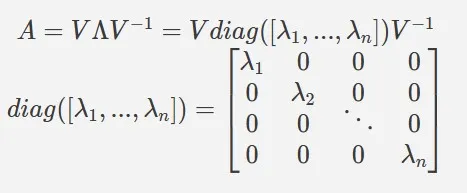

In [20]:
display(HTML(images_html[5]))

In [21]:
X = np.random.rand(100, 10)

In [22]:
X_covariance = 0.001 * (X.T @ X)

In [23]:
evalue, evect = np.linalg.eig(X_covariance)

## Loading and inspecting the Iris dataset

In [33]:
iris = load_iris()
X = iris.data       
y = iris.target

In [65]:
print("There are {} samples in the dataset".format(len(X)))
print("There are {} unique targets in the dataset".format(len(np.unique(y))))
print("Shape of each sample is {0}".format(X[0].shape))

There are 150 samples in the dataset
There are 3 unique targets in the dataset
Shape of each sample is (4,)


#### a) Exploring the dataset 

In [55]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [57]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [50]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### b) Plot the distribution of samples per target feature (class balance)

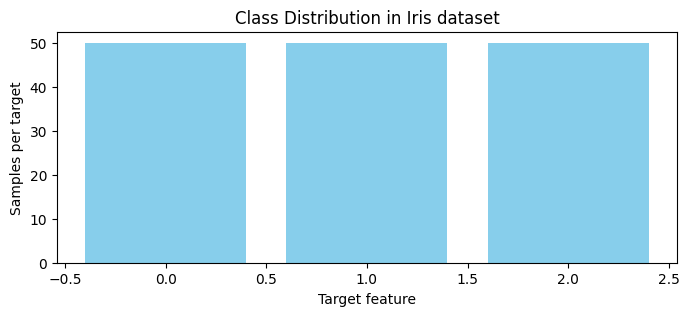

In [66]:
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(8, 3))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Target feature')
plt.ylabel('Samples per target')
plt.title('Class Distribution in Iris dataset')
plt.show()

## Scree plot: Visualize variance explained by each principal component

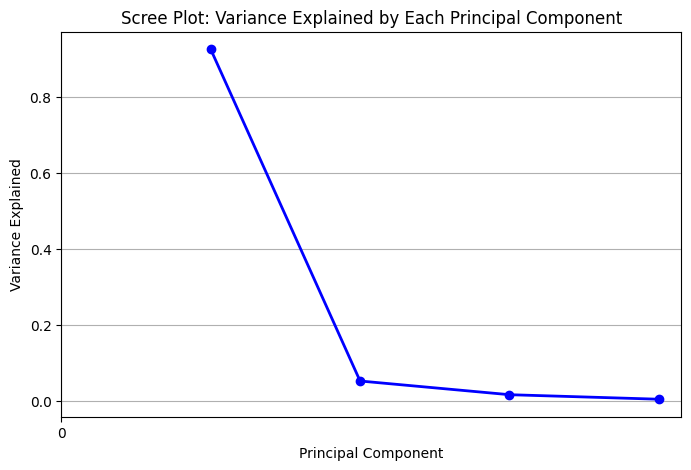

In [37]:
n_components_full = 4
pca_full = PCA(n_components=n_components_full, whiten=True, random_state=42)
X_pca_full = pca_full.fit_transform(X)

plt.figure(figsize=(8, 5))
components = np.arange(1, n_components_full + 1)
plt.plot(components, pca_full.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot: Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(0, n_components_full + 1, 10))
plt.grid(True)
plt.show()

## Visualizing PCA

#### a) PCA in 2D space

In [38]:
pca = PCA(n_components=2, whiten=True, random_state=42)
X_pca = pca.fit_transform(X)
explained_var = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_var}")
print(f"Total variance explained by 2 components: {explained_var.sum():.2%}")

Explained variance by each component: [0.92461872 0.05306648]
Total variance explained by 2 components: 97.77%


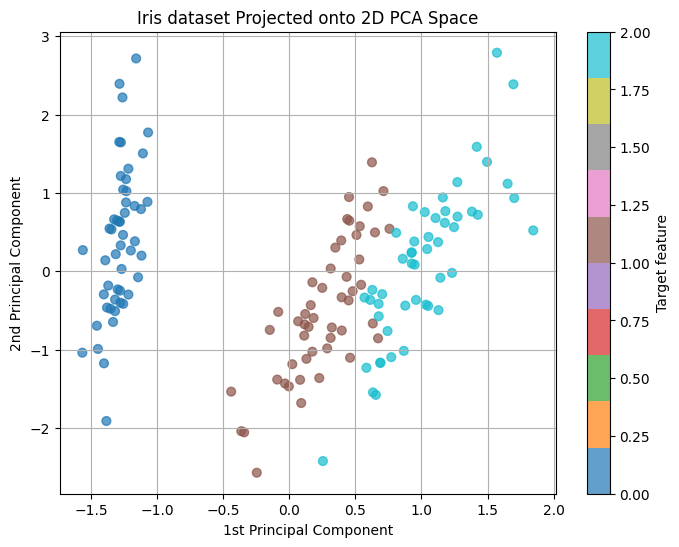

In [62]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7, s=40
)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Iris dataset Projected onto 2D PCA Space')
plt.colorbar(scatter, label='Target feature')
plt.grid(True)
plt.show()

#### b) PCA in 3D space

In [40]:
pca_3d = PCA(n_components=3, whiten=True, random_state=42)
X_pca_3d = pca_3d.fit_transform(X)
explained_var_3d = pca_3d.explained_variance_ratio_
total_var_3d = explained_var_3d.sum() * 100
print(f"Explained variance by each of 3D components: {explained_var_3d}")
print(f"Total variance explained by 3 components: {total_var_3d:.2f}%")

Explained variance by each of 3D components: [0.92461872 0.05306648 0.01710261]
Total variance explained by 3 components: 99.48%


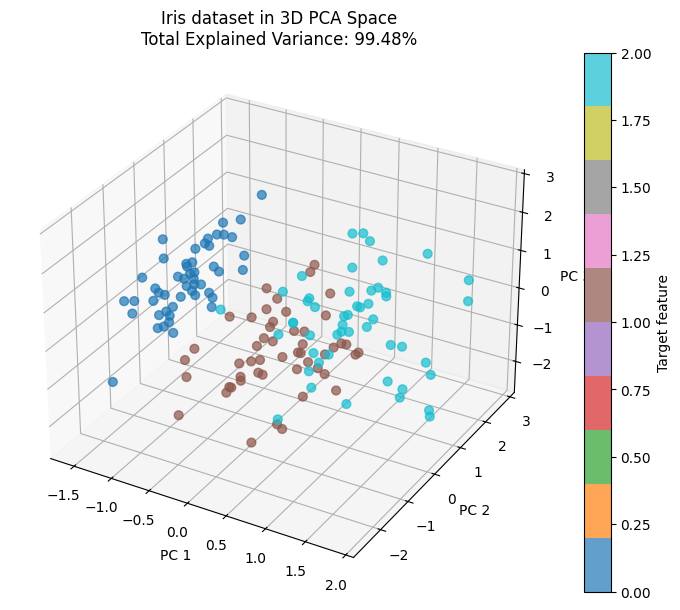

In [64]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=y, cmap='tab10', alpha=0.7, s=40
)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title(f'Iris dataset in 3D PCA Space\nTotal Explained Variance: {total_var_3d:.2f}%')
fig.colorbar(p, label='Target feature')
plt.show()

#### c) Plotly of PCA in 3D space

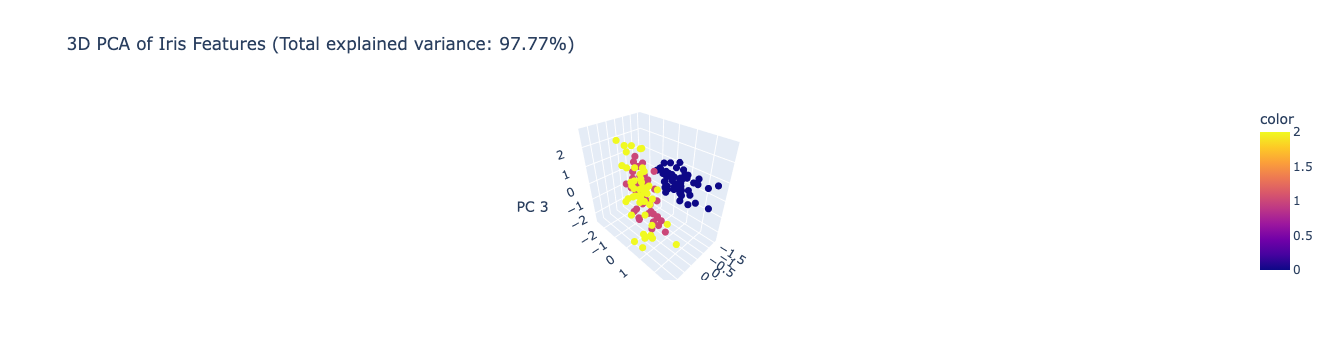

In [67]:
try:
    import plotly.express as px
    fig = px.scatter_3d(
        x=X_pca_3d[:, 0], y=X_pca_3d[:, 1], z=X_pca_3d[:, 2],
        color=y,
        labels={'x': 'PC 1', 'y': 'PC 2', 'z': 'PC 3'},
        title=f'3D PCA of Iris Features (Total explained variance: {np.sum(pca.explained_variance_ratio_)*100:.2f}%)'
    )
    fig.update_traces(marker=dict(size=4))
    fig.show()
except ImportError:
    print("Plotly not available for interactive 3D visualization. Using Matplotlib instead.")